# 情報源について
情報源は[経済学派(+α)の哲学的立場](https://holistic-theater-fae.notion.site/1c251e0c8142802c9bb1e4a30ebcea25?v=1c251e0c814280ba8007000c05bf87dc)と[経済学派(+α)の理論の前提の世界観](https://holistic-theater-fae.notion.site/15251e0c81428068bcc9ced938dfd82b?v=1a751e0c814280e48abf000cfad3db71)

一部項目を除いたり分割したりして、.obsのファイルで整数評価の表にする

そのあとでcalcの機能でCSVファイルで出力する

以下でそのCSVファイルを読み込んで分析する

# ライブラリインポート

お使いの環境に、事前にodfpyを追加しておいてください。.obsのファイルから情報を読むのに必要です

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import japanize_matplotlib
from adjustText import adjust_text

# 現在も活動が見られる学派について

## 哲学的な傾向の分析

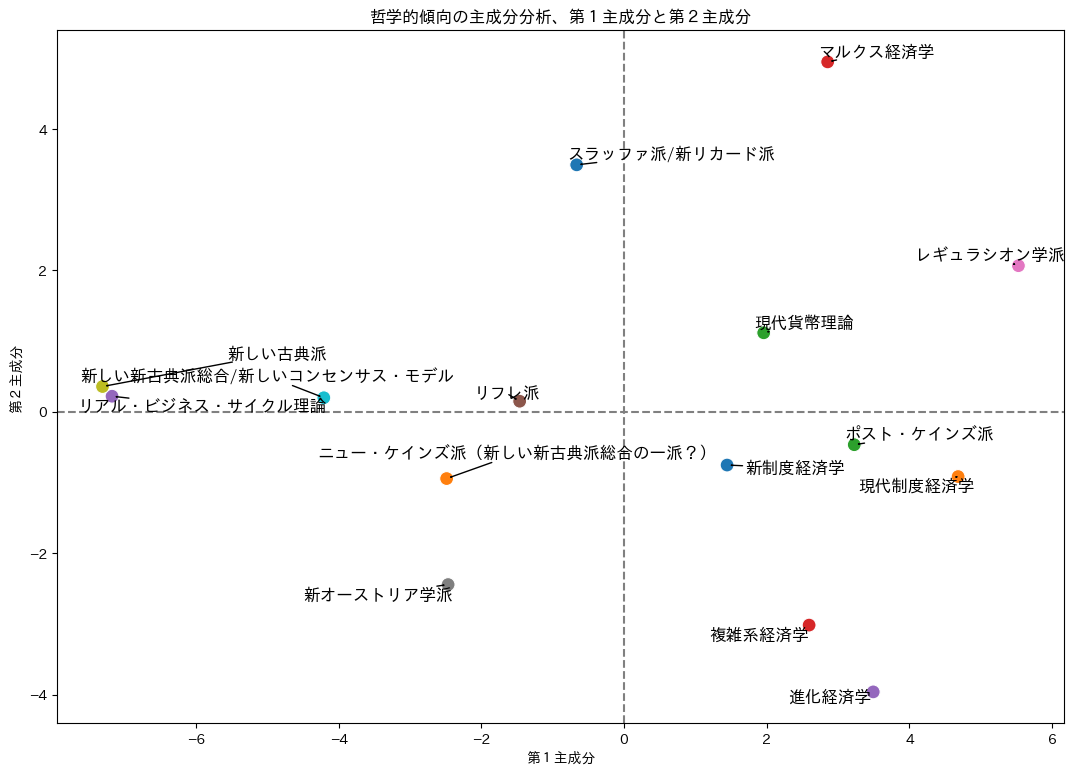

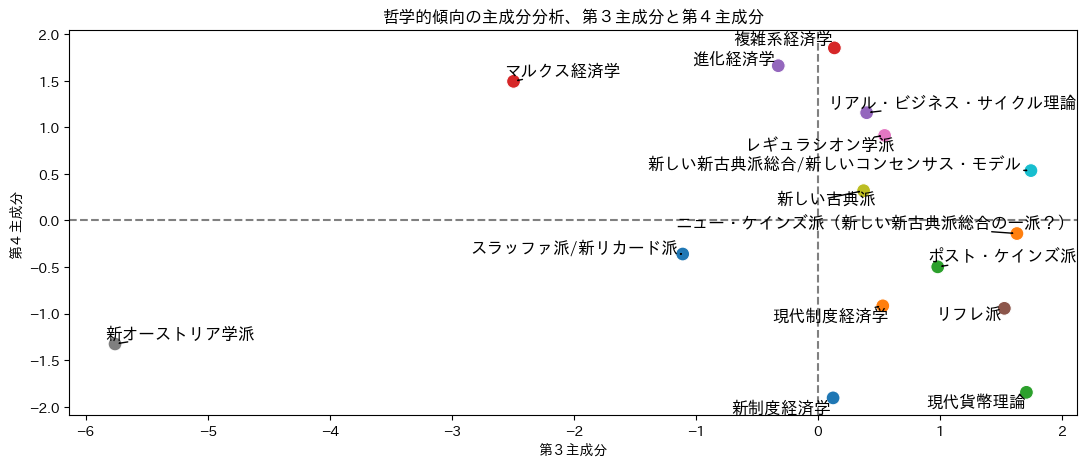

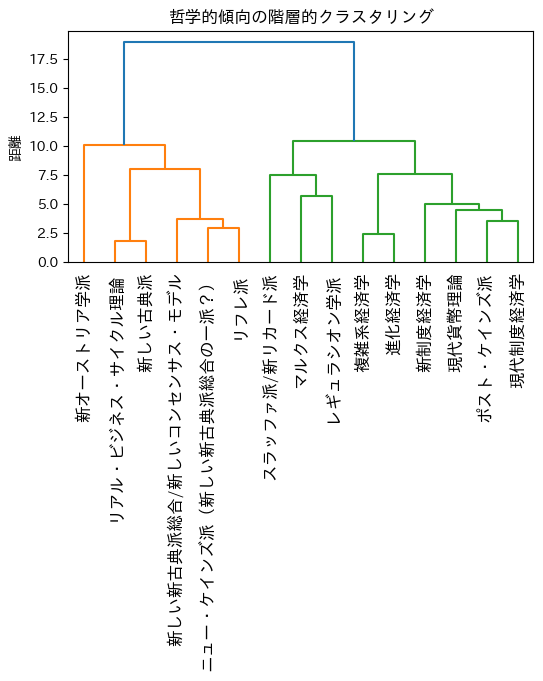

In [85]:
df = pd.read_excel("philosophy_mini.ods", engine="odf", index_col=0)

# 標準化
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCAの実行（2次元）
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_scaled)

# 結果をデータフレームに格納
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3", "PC4"], index=df.index)

# PCAプロット
plt.figure(figsize=(13, 9))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df.index, palette="tab10", s=100,legend=False)
texts = [plt.text(x, y, label, fontsize=12, ha='right') for label, x, y in zip(df_pca.index, df_pca["PC1"], df_pca["PC2"])]
adjust_text(texts, arrowprops=dict(arrowstyle='->'))
plt.axhline(0, color='gray', linestyle='dashed')
plt.axvline(0, color='gray', linestyle='dashed')
plt.xlabel("第１主成分")
plt.ylabel("第２主成分")
plt.title("哲学的傾向の主成分分析、第１主成分と第２主成分")
plt.show()

plt.figure(figsize=(13, 5))
sns.scatterplot(x=df_pca["PC3"], y=df_pca["PC4"], hue=df.index, palette="tab10", s=100,legend=False)
texts = [plt.text(x, y, label, fontsize=12, ha='right') for label, x, y in zip(df_pca.index, df_pca["PC3"], df_pca["PC4"])]
adjust_text(texts, arrowprops=dict(arrowstyle='->'))
plt.axhline(0, color='gray', linestyle='dashed')
plt.axvline(0, color='gray', linestyle='dashed')
plt.xlabel("第３主成分")
plt.ylabel("第４主成分")
plt.title("哲学的傾向の主成分分析、第３主成分と第４主成分")
plt.show()

# クラスター分析（階層的クラスタリング）
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(6, 3))
dendrogram(linked, labels=df.index, leaf_rotation=90, leaf_font_size=12)
plt.title("哲学的傾向の階層的クラスタリング")
plt.ylabel("距離")
plt.show()

## K平均法でクラスタリング

In [86]:
def cluster_kmeans(K):
    names = [[] for _ in range(K)]
    kmeans = KMeans(n_clusters=K, random_state=0).fit(df)
    print("K ={}".format(K))
    for i, l in enumerate(kmeans.labels_):
        names[l].append(list(df.index)[i])
    for i in range(K):
        print("クラスター{}".format(i+1))
        for j in range(len(names[i])):
            print("-", names[i][j])
        print()
    return names
Ks = [2, 3, 4, 5, 6]
for K in Ks:
    cluster_kmeans(K)

K =2
クラスター1
- ニュー・ケインズ派（新しい新古典派総合の一派？）
- リアル・ビジネス・サイクル理論
- 新しい古典派
- 新しい新古典派総合/新しいコンセンサス・モデル

クラスター2
- スラッファ派/新リカード派
- ポスト・ケインズ派
- マルクス経済学
- リフレ派
- レギュラシオン学派
- 新オーストリア学派
- 新制度経済学
- 現代制度経済学
- 現代貨幣理論
- 複雑系経済学
- 進化経済学

K =3
クラスター1
- ニュー・ケインズ派（新しい新古典派総合の一派？）
- リアル・ビジネス・サイクル理論
- リフレ派
- 新しい古典派
- 新しい新古典派総合/新しいコンセンサス・モデル

クラスター2
- スラッファ派/新リカード派
- ポスト・ケインズ派
- マルクス経済学
- レギュラシオン学派
- 新制度経済学
- 現代制度経済学
- 現代貨幣理論
- 複雑系経済学
- 進化経済学

クラスター3
- 新オーストリア学派

K =4
クラスター1
- ニュー・ケインズ派（新しい新古典派総合の一派？）
- リアル・ビジネス・サイクル理論
- 新しい古典派
- 新しい新古典派総合/新しいコンセンサス・モデル

クラスター2
- ポスト・ケインズ派
- リフレ派
- 新制度経済学
- 現代制度経済学
- 現代貨幣理論
- 複雑系経済学
- 進化経済学

クラスター3
- 新オーストリア学派

クラスター4
- スラッファ派/新リカード派
- マルクス経済学
- レギュラシオン学派

K =5
クラスター1
- リアル・ビジネス・サイクル理論
- 新しい古典派
- 新しい新古典派総合/新しいコンセンサス・モデル

クラスター2
- ニュー・ケインズ派（新しい新古典派総合の一派？）
- ポスト・ケインズ派
- リフレ派
- 新制度経済学
- 現代制度経済学
- 現代貨幣理論

クラスター3
- 新オーストリア学派

クラスター4
- スラッファ派/新リカード派
- マルクス経済学
- レギュラシオン学派

クラスター5
- 複雑系経済学
- 進化経済学

K =6
クラスター1
- リアル・ビジネス・サイクル理論
- 新しい古典派
- 新しい新古典派総合/新しいコンセンサス・モデル

クラスター2
- ニュー・ケインズ派（新しい新古典派

## 相互距離一覧

In [87]:
def cal_distance():
    d_max = 0.0
    distance_table = pd.DataFrame(np.zeros((len(df.index), len(df.index))), index=list(df.index), columns=list(df.index))
    for i in range(len(df.index)):
        for j in range(len(df.index)):
            d = np.sqrt(sum((df_scaled[i,:] - df_scaled[j,:])**2))
            distance_table.iloc[i,j] = d
            if d > d_max:
                d_max = d
    distance_table.iloc[:,:] /= d_max
    return distance_table
cal_distance()

,スラッファ派/新リカード派,ニュー・ケインズ派（新しい新古典派総合の一派？）,ポスト・ケインズ派,マルクス経済学,リアル・ビジネス・サイクル理論,リフレ派,レギュラシオン学派,新オーストリア学派,新しい古典派,新しい新古典派総合/新しいコンセンサス・モデル,新制度経済学,現代制度経済学,現代貨幣理論,複雑系経済学,進化経済学
スラッファ派/新リカード派,0.000000,0.504483,0.522826,0.465662,0.631643,0.460987,0.600526,0.657747,0.623098,0.506065,0.476214,0.607590,0.463639,0.618065,0.694700
ニュー・ケインズ派（新しい新古典派総合の一派？）,0.504483,0.000000,0.477644,0.701507,0.430519,0.224769,0.689068,0.596265,0.431102,0.228046,0.419919,0.575232,0.460785,0.500903,0.568843
ポスト・ケインズ派,0.522826,0.477644,0.000000,0.557068,0.823356,0.442301,0.362508,0.707580,0.824272,0.612901,0.361606,0.270689,0.284852,0.348792,0.380535
マルクス経済学,0.465662,0.701507,0.557068,0.000000,0.883178,0.620317,0.435064,0.777964,0.889793,0.745063,0.589309,0.574431,0.542981,0.659821,0.714688
リアル・ビジネス・サイクル理論,0.631643,0.430519,0.823356,0.883178,0.000000,0.502583,0.980103,0.657722,0.137639,0.297364,0.728772,0.925403,0.754705,0.794662,0.881808
リフレ派,0.460987,0.224769,0.442301,0.620317,0.502583,0.000000,0.609086,0.611257,0.511190,0.301172,0.372553,0.522129,0.354002,0.497637,0.572697
レギュラシオン学派,0.600526,0.689068,0.362508,0.435064,0.980103,0.609086,0.000000,0.866729,1.000000,0.773036,0.510610,0.326779,0.413334,0.502016,0.531253
新オーストリア学派,0.657747,0.596265,0.707580,0.777964,0.657722,0.611257,0.866729,0.000000,0.660381,0.641196,0.614097,0.746948,0.725794,0.661624,0.678085
新しい古典派,0.623098,0.431102,0.824272,0.889793,0.137639,0.511190,1.000000,0.660381,0.000000,0.327674,0.717061,0.932258,0.748241,0.812814,0.898200
新しい新古典派総合/新しいコンセンサス・モデル,0.506065,0.228046,0.612901,0.745063,0.297364,0.301172,0.773036,0.641196,0.327674,0.000000,0.550351,0.710801,0.542987,0.618981,0.705686


## 理論の前提の分析

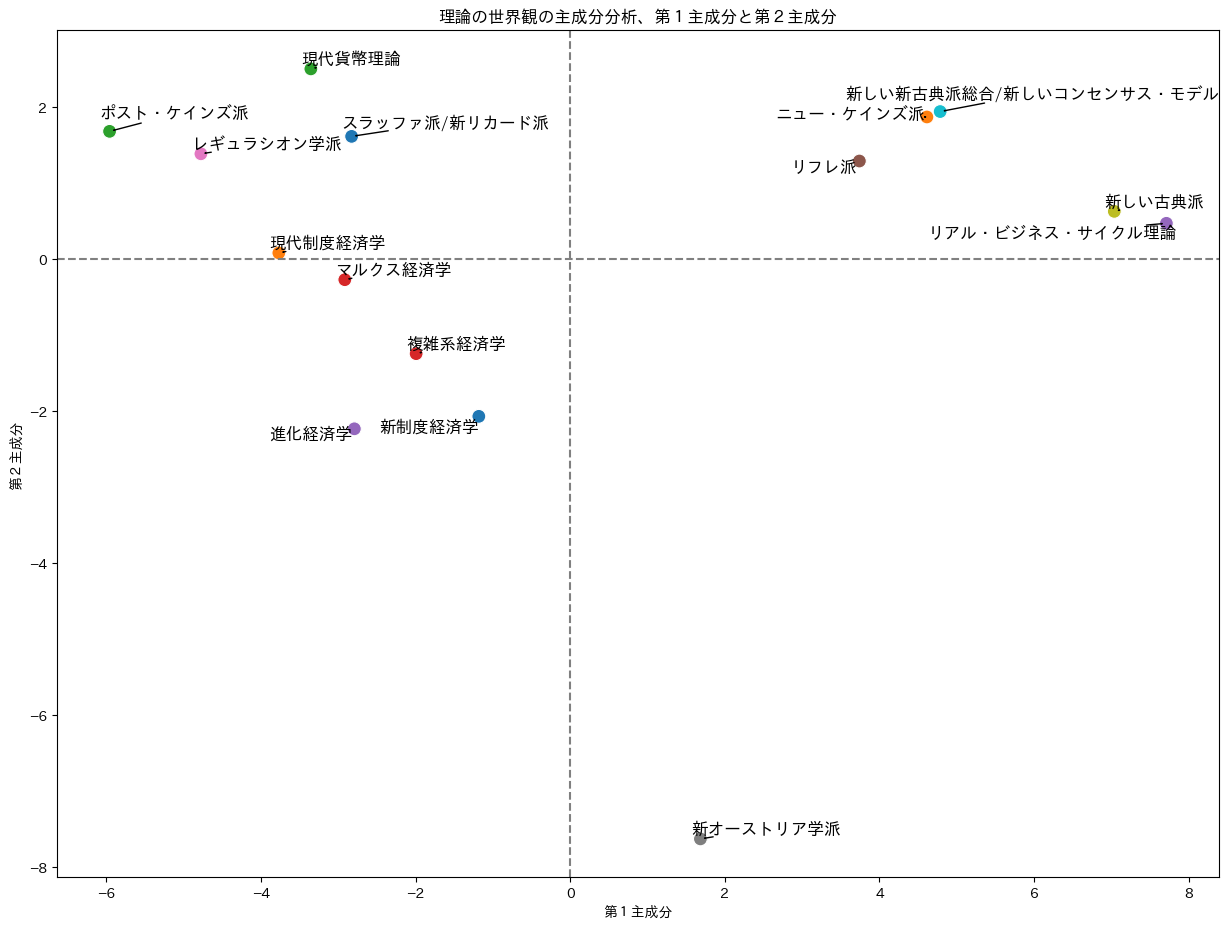

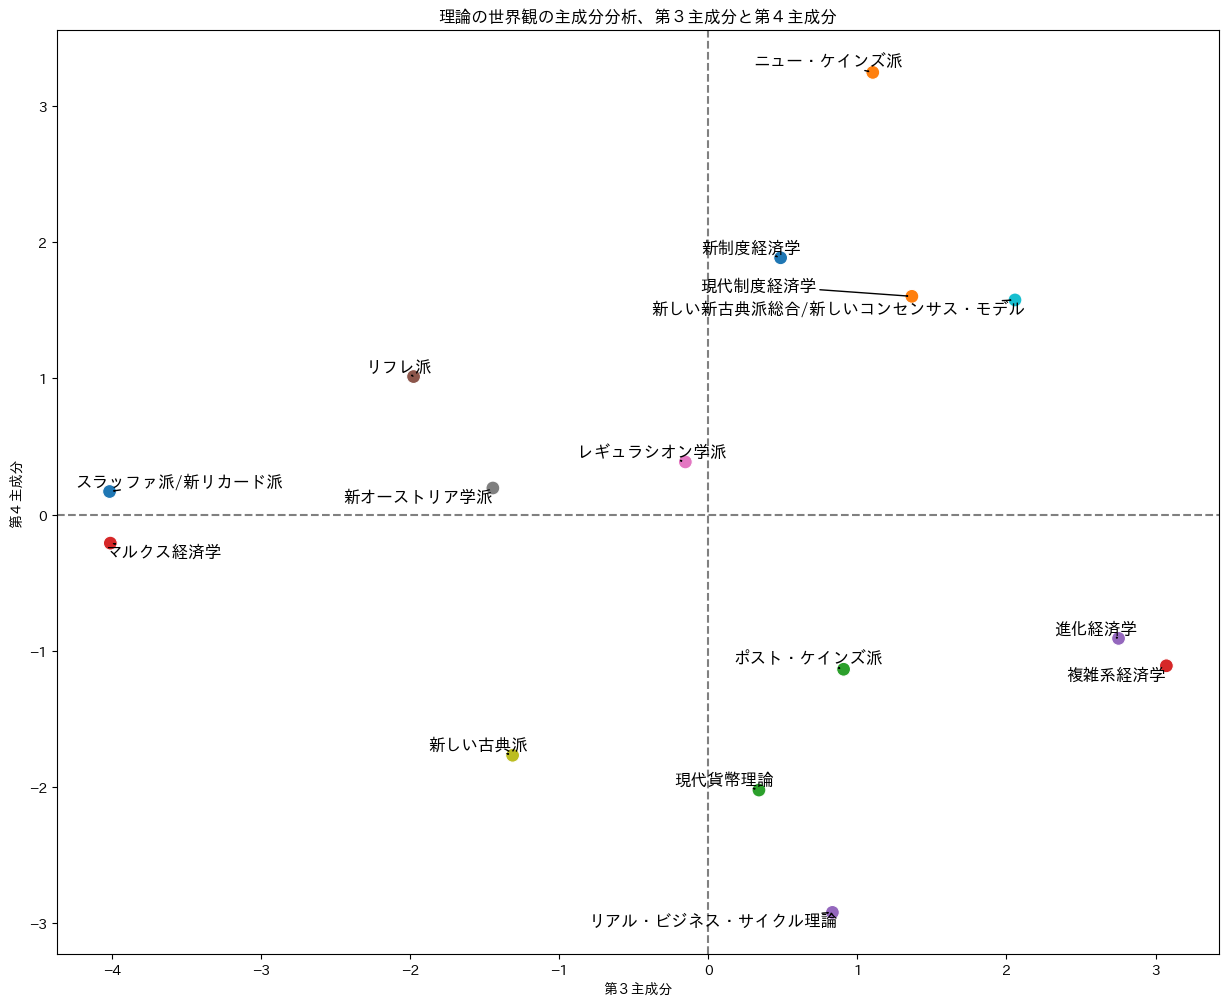

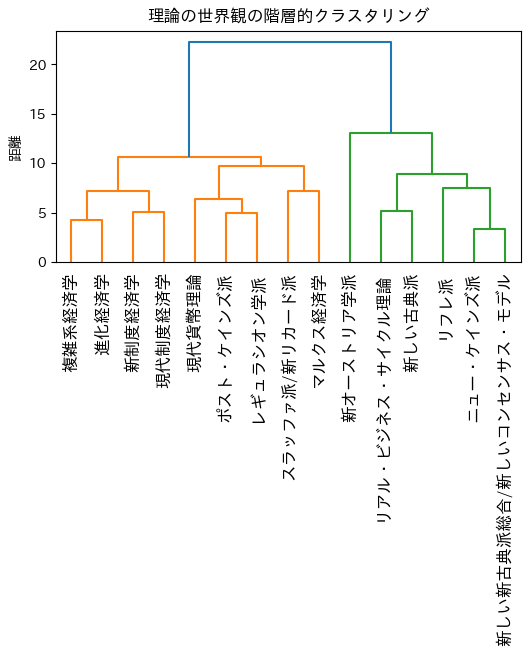

In [88]:
df = pd.read_excel("theory_mini.ods", engine="odf", index_col=0)

# 標準化
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCAの実行（４次元）
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_scaled)

# 結果をデータフレームに格納
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3", "PC4"], index=df.index)

# PCAプロット
plt.figure(figsize=(15, 11))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df.index, palette="tab10", s=100,legend=False)
texts = [plt.text(x, y, label, fontsize=12, ha='right') for label, x, y in zip(df_pca.index, df_pca["PC1"], df_pca["PC2"])]
adjust_text(texts, arrowprops=dict(arrowstyle='->'))
plt.axhline(0, color='gray', linestyle='dashed')
plt.axvline(0, color='gray', linestyle='dashed')
plt.xlabel("第１主成分")
plt.ylabel("第２主成分")
plt.title("理論の世界観の主成分分析、第１主成分と第２主成分")
plt.show()

plt.figure(figsize=(15, 12))
sns.scatterplot(x=df_pca["PC3"], y=df_pca["PC4"], hue=df.index, palette="tab10", s=100,legend=False)
texts = [plt.text(x, y, label, fontsize=12, ha='right') for label, x, y in zip(df_pca.index, df_pca["PC3"], df_pca["PC4"])]
adjust_text(texts, arrowprops=dict(arrowstyle='->'))
plt.axhline(0, color='gray', linestyle='dashed')
plt.axvline(0, color='gray', linestyle='dashed')
plt.xlabel("第３主成分")
plt.ylabel("第４主成分")
plt.title("理論の世界観の主成分分析、第３主成分と第４主成分")
plt.show()

# クラスター分析（階層的クラスタリング）
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(6,3))
dendrogram(linked, labels=df.index, leaf_rotation=90, leaf_font_size=12)
plt.title("理論の世界観の階層的クラスタリング")
plt.ylabel("距離")
plt.show()


In [89]:
Ks = [2, 3, 4, 5, 6]
for K in Ks:
    cluster_kmeans(K)

K =2
クラスター1
- ニュー・ケインズ派
- リアル・ビジネス・サイクル理論
- リフレ派
- 新しい古典派
- 新しい新古典派総合/新しいコンセンサス・モデル

クラスター2
- スラッファ派/新リカード派
- ポスト・ケインズ派
- マルクス経済学
- レギュラシオン学派
- 新オーストリア学派
- 新制度経済学
- 現代制度経済学
- 現代貨幣理論
- 複雑系経済学
- 進化経済学

K =3
クラスター1
- ニュー・ケインズ派
- リアル・ビジネス・サイクル理論
- リフレ派
- 新しい古典派
- 新しい新古典派総合/新しいコンセンサス・モデル

クラスター2
- スラッファ派/新リカード派
- ポスト・ケインズ派
- マルクス経済学
- レギュラシオン学派
- 新制度経済学
- 現代制度経済学
- 現代貨幣理論
- 複雑系経済学
- 進化経済学

クラスター3
- 新オーストリア学派

K =4
クラスター1
- ニュー・ケインズ派
- リアル・ビジネス・サイクル理論
- リフレ派
- 新しい古典派
- 新しい新古典派総合/新しいコンセンサス・モデル

クラスター2
- マルクス経済学
- 新制度経済学
- 現代制度経済学
- 複雑系経済学
- 進化経済学

クラスター3
- 新オーストリア学派

クラスター4
- スラッファ派/新リカード派
- ポスト・ケインズ派
- レギュラシオン学派
- 現代貨幣理論

K =5
クラスター1
- リアル・ビジネス・サイクル理論
- リフレ派
- 新しい古典派

クラスター2
- マルクス経済学
- 新制度経済学
- 現代制度経済学
- 複雑系経済学
- 進化経済学

クラスター3
- 新オーストリア学派

クラスター4
- スラッファ派/新リカード派
- ポスト・ケインズ派
- レギュラシオン学派
- 現代貨幣理論

クラスター5
- ニュー・ケインズ派
- 新しい新古典派総合/新しいコンセンサス・モデル

K =6
クラスター1
- リアル・ビジネス・サイクル理論
- リフレ派
- 新しい古典派

クラスター2
- 新制度経済学
- 現代制度経済学
- 複雑系経済学
- 進化経済学

クラスター3
- 新オーストリア学派

クラスター4
- ポスト・ケインズ派
- レギュラシオン学派
- 現代貨幣理論



In [90]:
cal_distance()

,スラッファ派/新リカード派,ニュー・ケインズ派,ポスト・ケインズ派,マルクス経済学,リアル・ビジネス・サイクル理論,リフレ派,レギュラシオン学派,新オーストリア学派,新しい古典派,新しい新古典派総合/新しいコンセンサス・モデル,新制度経済学,現代制度経済学,現代貨幣理論,複雑系経済学,進化経済学
スラッファ派/新リカード派,0.000000,0.707072,0.539974,0.497968,0.887634,0.639867,0.515976,0.804061,0.795804,0.747796,0.532370,0.553236,0.504651,0.628283,0.593989
ニュー・ケインズ派,0.707072,0.000000,0.834903,0.764703,0.522733,0.456562,0.755510,0.771901,0.507601,0.232779,0.572264,0.673816,0.719024,0.660994,0.699862
ポスト・ケインズ派,0.539974,0.834903,0.000000,0.619122,1.000000,0.781966,0.343768,0.872146,0.963219,0.805992,0.570318,0.422259,0.366603,0.541305,0.488373
マルクス経済学,0.497968,0.764703,0.619122,0.000000,0.883775,0.700113,0.544846,0.771980,0.830316,0.770341,0.524453,0.544708,0.587029,0.599939,0.598441
リアル・ビジネス・サイクル理論,0.887634,0.522733,1.000000,0.883775,0.000000,0.570564,0.947247,0.796001,0.359572,0.439847,0.765746,0.902555,0.852290,0.775599,0.809255
リフレ派,0.639867,0.456562,0.781966,0.700113,0.570564,0.000000,0.708481,0.717297,0.470703,0.473197,0.580597,0.693987,0.679167,0.672375,0.706128
レギュラシオン学派,0.515976,0.755510,0.343768,0.544846,0.947247,0.708481,0.000000,0.826027,0.908332,0.748530,0.526920,0.455582,0.471105,0.536593,0.494981
新オーストリア学派,0.804061,0.771901,0.872146,0.771980,0.796001,0.717297,0.826027,0.000000,0.747337,0.774385,0.573093,0.749710,0.837946,0.721355,0.649989
新しい古典派,0.795804,0.507601,0.963219,0.830316,0.359572,0.470703,0.908332,0.747337,0.000000,0.450744,0.696690,0.839487,0.788934,0.785961,0.815590
新しい新古典派総合/新しいコンセンサス・モデル,0.747796,0.232779,0.805992,0.770341,0.439847,0.473197,0.748530,0.774385,0.450744,0.000000,0.572093,0.670211,0.688494,0.644990,0.665905


# 活動が見られない学派と経済学以外まで含めて、もう一度

## 哲学的な傾向の分析

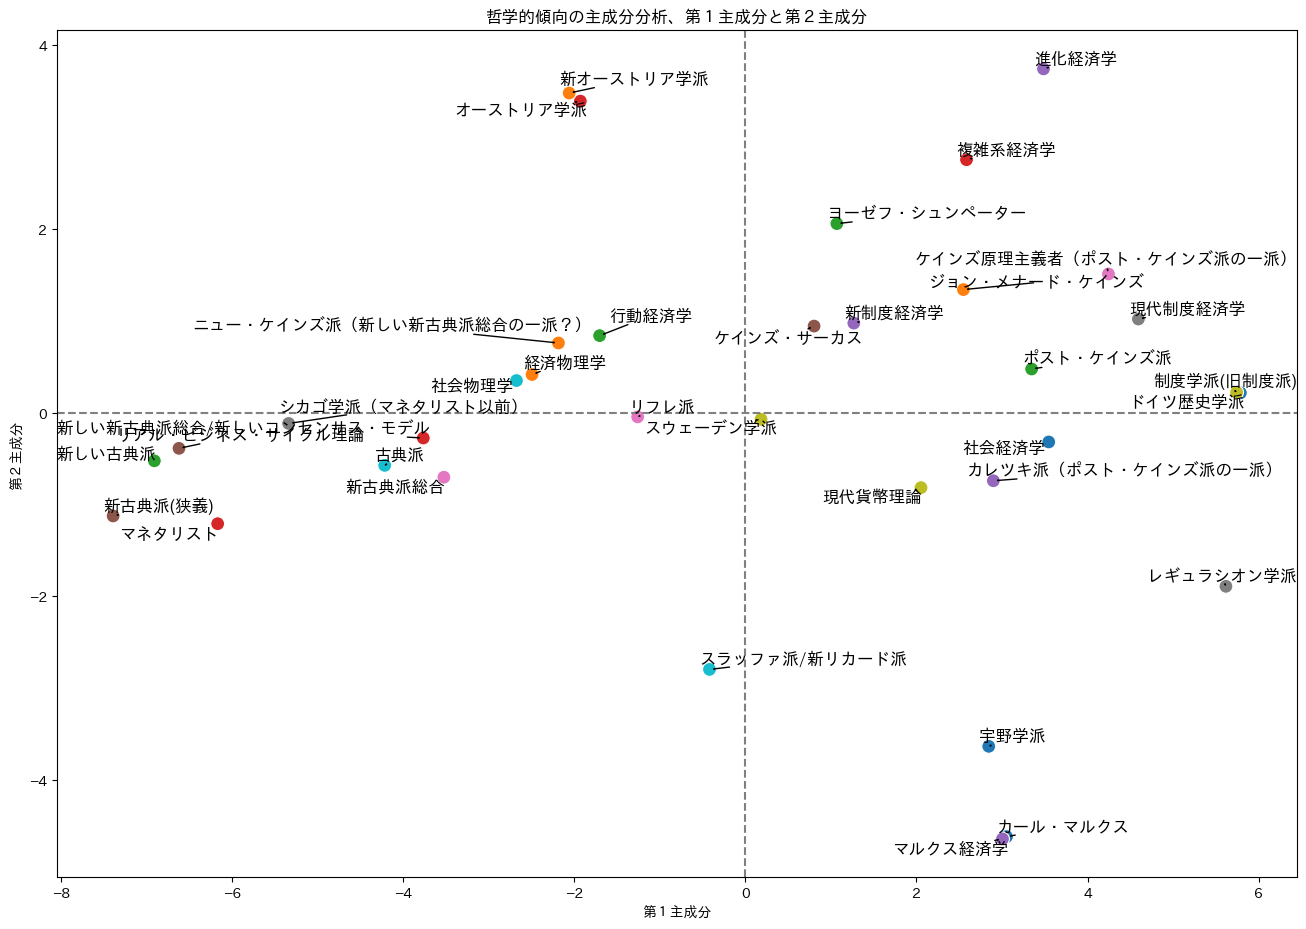

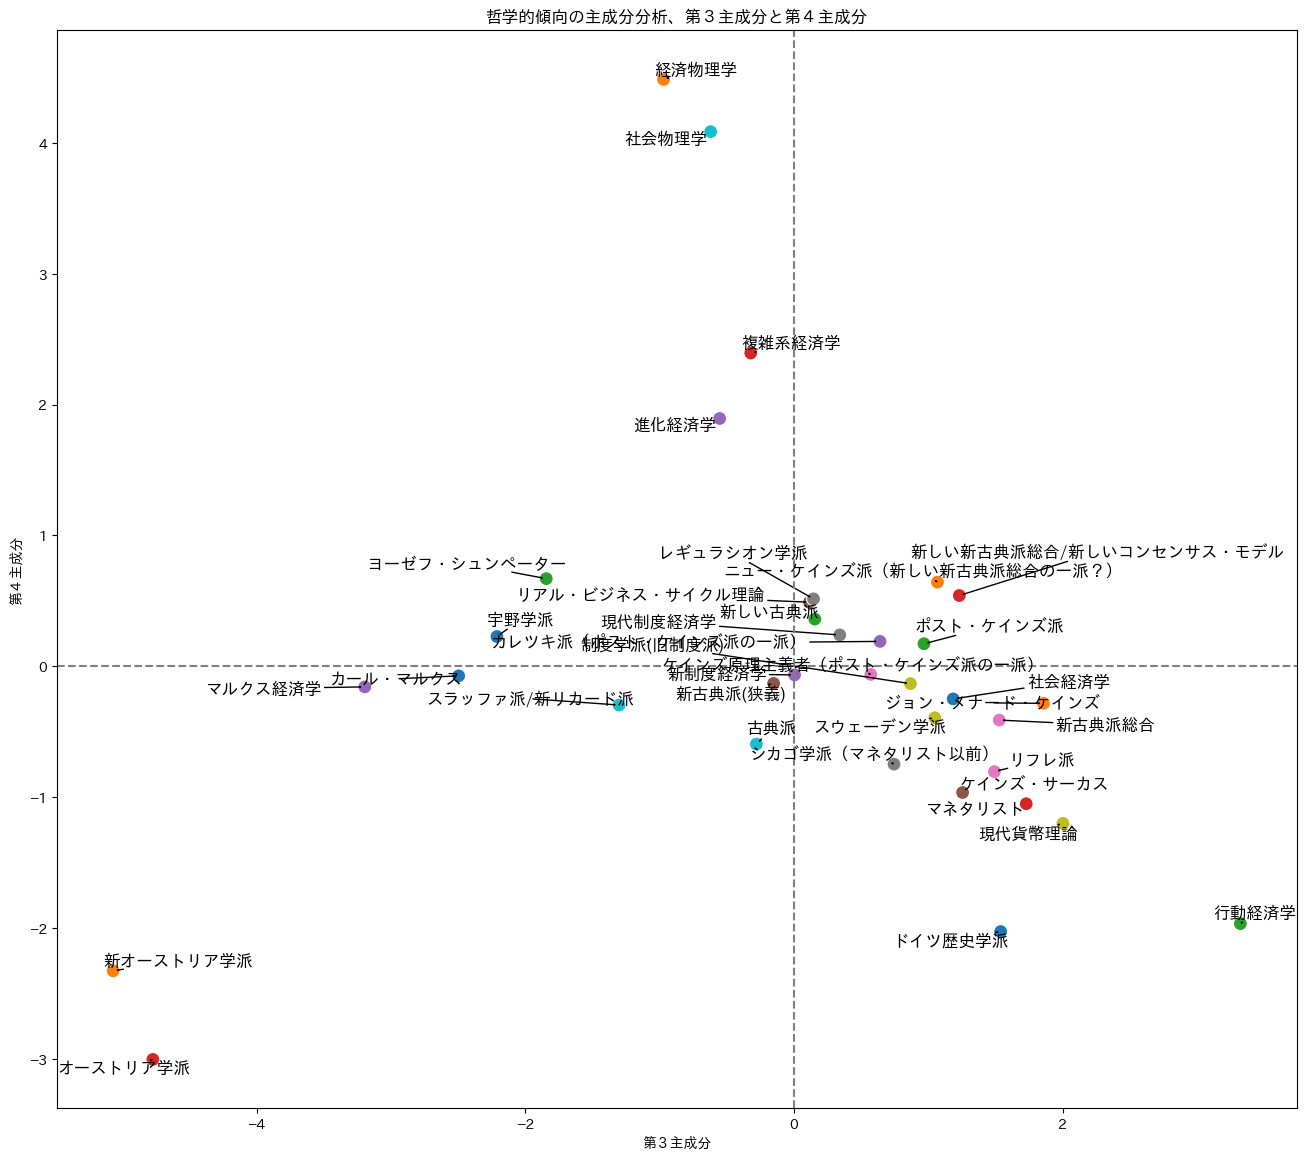

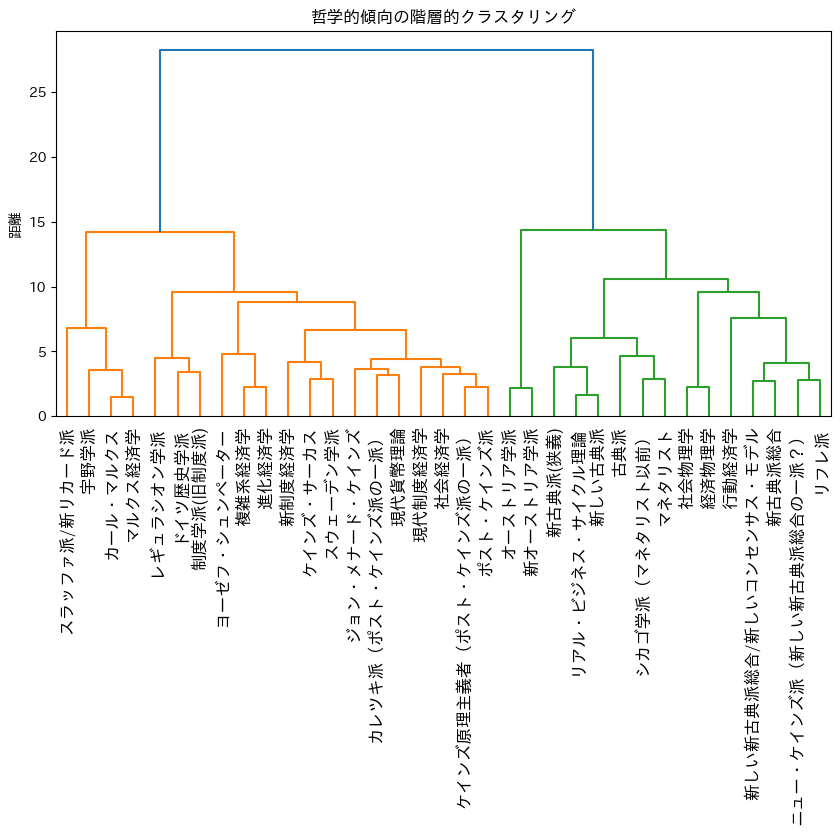

In [91]:
# データフレーム読み込み
df = pd.read_excel("philosophy.ods", engine="odf", index_col=0)

# 標準化
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCAの実行（４次元）
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_scaled)

# 結果をデータフレームに格納
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3", "PC4"], index=df.index)

# PCAプロット
plt.figure(figsize=(16, 11))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df.index, palette="tab10", s=100,legend=False)
texts = [plt.text(x, y, label, fontsize=12, ha='right') for label, x, y in zip(df_pca.index, df_pca["PC1"], df_pca["PC2"])]
adjust_text(texts, arrowprops=dict(arrowstyle='->'))
plt.axhline(0, color='gray', linestyle='dashed')
plt.axvline(0, color='gray', linestyle='dashed')
plt.xlabel("第１主成分")
plt.ylabel("第２主成分")
plt.title("哲学的傾向の主成分分析、第１主成分と第２主成分")
plt.show()

plt.figure(figsize=(16, 14))
sns.scatterplot(x=df_pca["PC3"], y=df_pca["PC4"], hue=df.index, palette="tab10", s=100,legend=False)
texts = [plt.text(x, y, label, fontsize=12, ha='right') for label, x, y in zip(df_pca.index, df_pca["PC3"], df_pca["PC4"])]
adjust_text(texts, arrowprops=dict(arrowstyle='->'))
plt.axhline(0, color='gray', linestyle='dashed')
plt.axvline(0, color='gray', linestyle='dashed')
plt.xlabel("第３主成分")
plt.ylabel("第４主成分")
plt.title("哲学的傾向の主成分分析、第３主成分と第４主成分")
plt.show()

# クラスター分析（階層的クラスタリング）
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(10,5))
dendrogram(linked, labels=df.index, leaf_rotation=90, leaf_font_size=12)
plt.title("哲学的傾向の階層的クラスタリング")
plt.ylabel("距離")
plt.show()


In [92]:
Ks = [2, 3, 4, 5, 6]
for K in Ks:
    cluster_kmeans(K)

K =2
クラスター1
- オーストリア学派
- シカゴ学派（マネタリスト以前）
- ニュー・ケインズ派（新しい新古典派総合の一派？）
- マネタリスト
- リアル・ビジネス・サイクル理論
- リフレ派
- 古典派
- 新オーストリア学派
- 新しい古典派
- 新しい新古典派総合/新しいコンセンサス・モデル
- 新古典派(狭義)
- 新古典派総合
- 社会物理学
- 経済物理学
- 行動経済学

クラスター2
- カール・マルクス
- ジョン・メナード・ケインズ
- ヨーゼフ・シュンペーター
- カレツキ派（ポスト・ケインズ派の一派）
- ケインズ・サーカス
- ケインズ原理主義者（ポスト・ケインズ派の一派）
- スウェーデン学派
- スラッファ派/新リカード派
- ドイツ歴史学派
- ポスト・ケインズ派
- マルクス経済学
- レギュラシオン学派
- 制度学派(旧制度派)
- 宇野学派
- 新制度経済学
- 現代制度経済学
- 現代貨幣理論
- 社会経済学
- 複雑系経済学
- 進化経済学

K =3
クラスター1
- オーストリア学派
- シカゴ学派（マネタリスト以前）
- ニュー・ケインズ派（新しい新古典派総合の一派？）
- マネタリスト
- リアル・ビジネス・サイクル理論
- リフレ派
- 古典派
- 新オーストリア学派
- 新しい古典派
- 新しい新古典派総合/新しいコンセンサス・モデル
- 新古典派(狭義)
- 新古典派総合
- 社会物理学
- 経済物理学
- 行動経済学

クラスター2
- ジョン・メナード・ケインズ
- ヨーゼフ・シュンペーター
- カレツキ派（ポスト・ケインズ派の一派）
- ケインズ・サーカス
- ケインズ原理主義者（ポスト・ケインズ派の一派）
- スウェーデン学派
- ドイツ歴史学派
- ポスト・ケインズ派
- 制度学派(旧制度派)
- 新制度経済学
- 現代制度経済学
- 現代貨幣理論
- 社会経済学
- 複雑系経済学
- 進化経済学

クラスター3
- カール・マルクス
- スラッファ派/新リカード派
- マルクス経済学
- レギュラシオン学派
- 宇野学派

K =4
クラスター1
- オーストリア学派
- ニュー・ケインズ派（新しい新古典派総合の一派？）
- リフレ派
- 古典派
- 新オーストリア学派
- 社会物理学
-

In [94]:
cal_distance()

,カール・マルクス,ジョン・メナード・ケインズ,ヨーゼフ・シュンペーター,オーストリア学派,カレツキ派（ポスト・ケインズ派の一派）,ケインズ・サーカス,ケインズ原理主義者（ポスト・ケインズ派の一派）,シカゴ学派（マネタリスト以前）,スウェーデン学派,スラッファ派/新リカード派,...,新古典派(狭義),新古典派総合,現代制度経済学,現代貨幣理論,社会物理学,社会経済学,経済物理学,行動経済学,複雑系経済学,進化経済学
カール・マルクス,0.000000,0.556534,0.533753,0.745060,0.405075,0.549932,0.523188,0.740071,0.512646,0.427118,...,0.821067,0.643223,0.510243,0.476180,0.670367,0.451417,0.663702,0.737134,0.593983,0.638880
ジョン・メナード・ケインズ,0.556534,0.000000,0.376818,0.646718,0.243666,0.206763,0.238856,0.627200,0.298082,0.528884,...,0.764632,0.505101,0.292873,0.259358,0.566732,0.281681,0.571843,0.481850,0.368882,0.379714
ヨーゼフ・シュンペーター,0.533753,0.376818,0.000000,0.466367,0.364522,0.357583,0.358223,0.549393,0.345873,0.458188,...,0.674692,0.512718,0.379810,0.428590,0.434268,0.377079,0.437738,0.544770,0.294451,0.319692
オーストリア学派,0.745060,0.646718,0.466367,0.000000,0.661737,0.565311,0.655259,0.591418,0.579118,0.599904,...,0.656740,0.589415,0.681926,0.669042,0.644057,0.681006,0.647770,0.687465,0.624396,0.633342
カレツキ派（ポスト・ケインズ派の一派）,0.405075,0.243666,0.364522,0.661737,0.000000,0.288675,0.253512,0.621021,0.259947,0.416968,...,0.748823,0.517946,0.273419,0.226963,0.539575,0.240173,0.538149,0.531575,0.363649,0.421756
ケインズ・サーカス,0.549932,0.206763,0.357583,0.565311,0.288675,0.000000,0.329948,0.507864,0.203168,0.438558,...,0.634844,0.403240,0.372151,0.257878,0.514523,0.338177,0.520147,0.423476,0.409760,0.426834
ケインズ原理主義者（ポスト・ケインズ派の一派）,0.523188,0.238856,0.358223,0.655259,0.253512,0.329948,0.000000,0.730134,0.382428,0.529359,...,0.867991,0.615238,0.231158,0.306695,0.625275,0.233101,0.614503,0.588972,0.313547,0.301336
シカゴ学派（マネタリスト以前）,0.740071,0.627200,0.549393,0.591418,0.621021,0.507864,0.730134,0.000000,0.448355,0.502198,...,0.244048,0.277707,0.749289,0.585950,0.455527,0.668993,0.488935,0.459825,0.669646,0.741799
スウェーデン学派,0.512646,0.298082,0.345873,0.579118,0.259947,0.203168,0.382428,0.448355,0.000000,0.377514,...,0.569914,0.361618,0.396050,0.250443,0.455031,0.343666,0.464044,0.401452,0.403088,0.469636
スラッファ派/新リカード派,0.427118,0.528884,0.458188,0.599904,0.416968,0.438558,0.529359,0.502198,0.377514,0.000000,...,0.564678,0.420481,0.541653,0.419082,0.483733,0.436297,0.484692,0.580998,0.564718,0.627007


## 理論の前提の分析

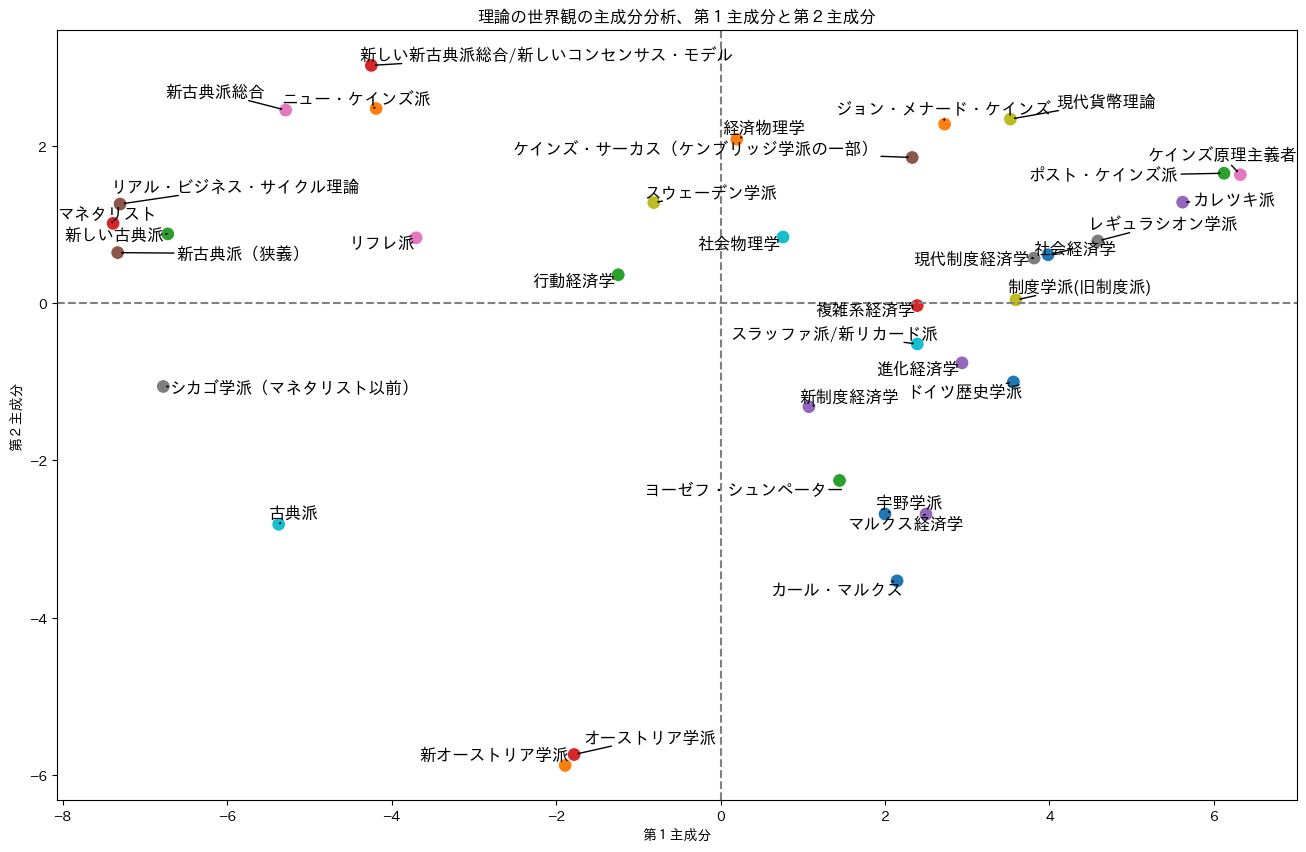

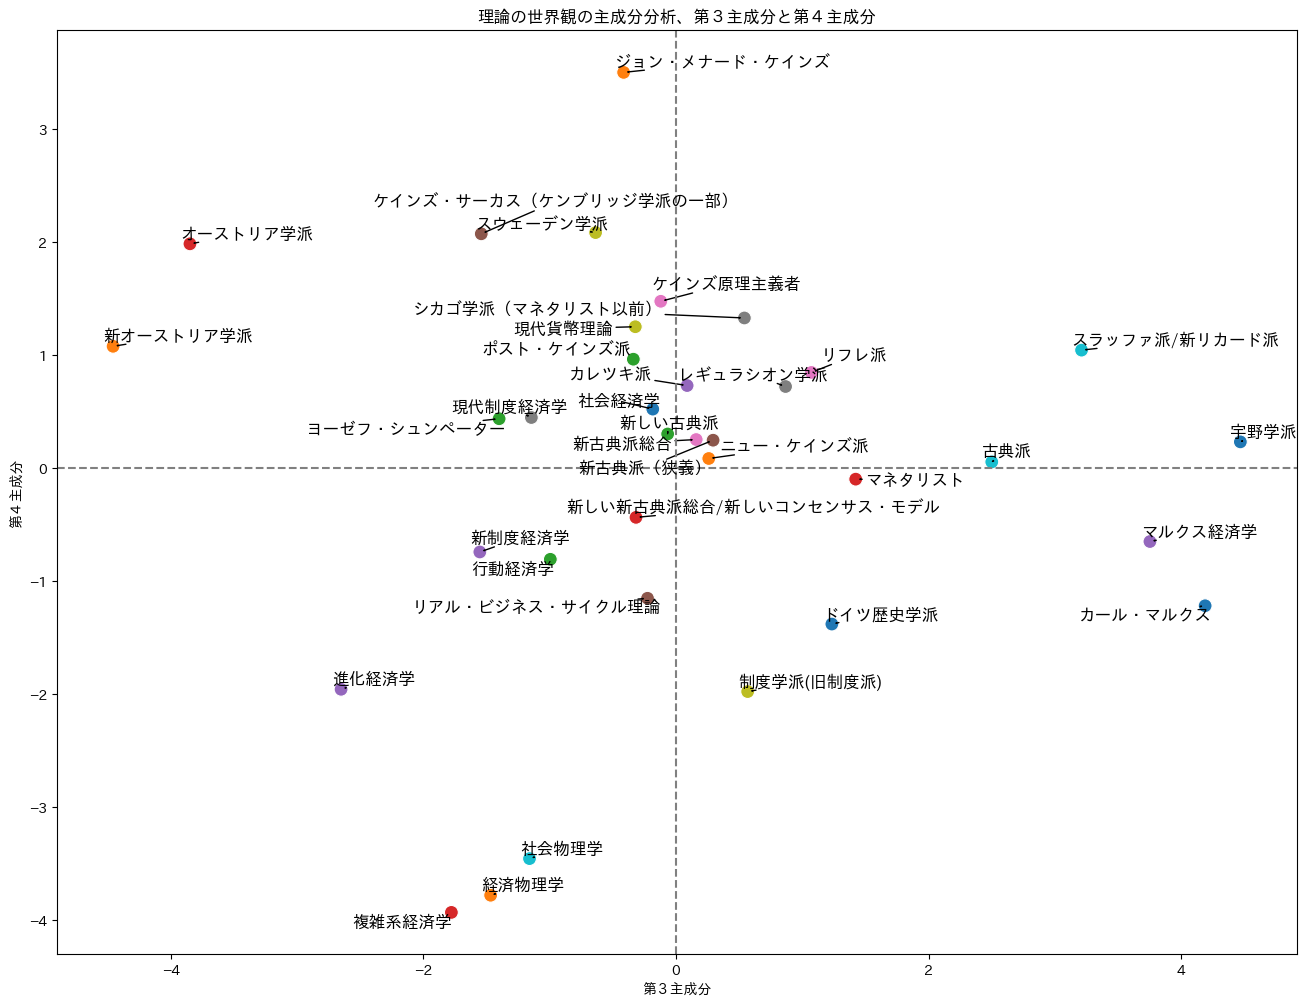

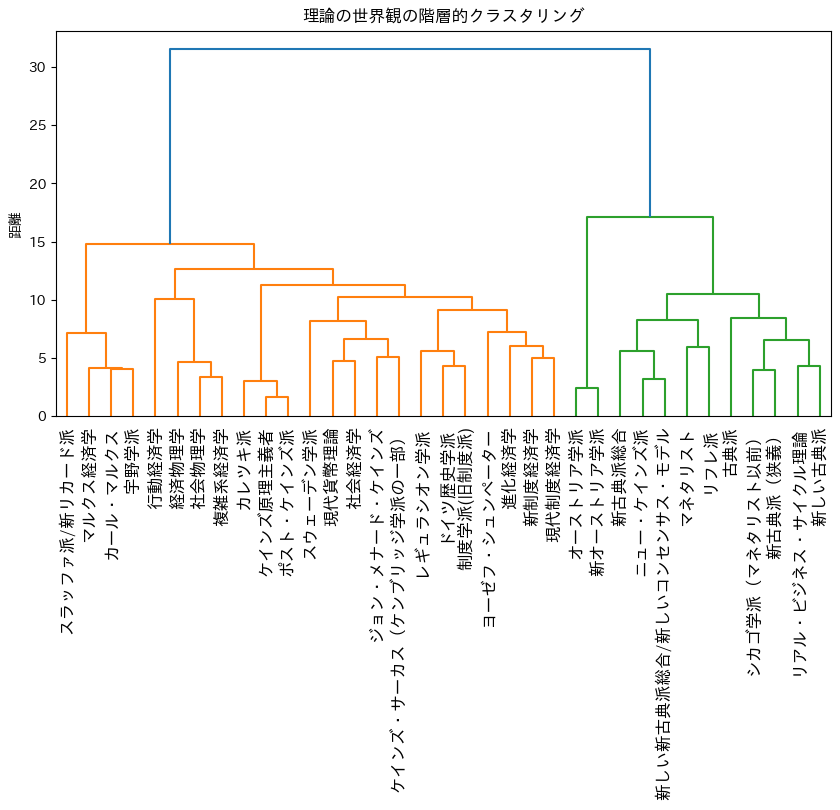

In [95]:
# データフレーム読み込み
df = pd.read_excel("theory.ods", engine="odf", index_col=0)

# 標準化
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCAの実行（4次元）
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_scaled)

# 結果をデータフレームに格納
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3", "PC4"], index=df.index)

# PCAプロット
plt.figure(figsize=(16, 10))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df.index, palette="tab10", s=100,legend=False)
texts = [plt.text(x, y, label, fontsize=12, ha='right') for label, x, y in zip(df_pca.index, df_pca["PC1"], df_pca["PC2"])]
adjust_text(texts, arrowprops=dict(arrowstyle='->'))
plt.axhline(0, color='gray', linestyle='dashed')
plt.axvline(0, color='gray', linestyle='dashed')
plt.xlabel("第１主成分")
plt.ylabel("第２主成分")
plt.title("理論の世界観の主成分分析、第１主成分と第２主成分")
plt.show()

plt.figure(figsize=(16, 12))
sns.scatterplot(x=df_pca["PC3"], y=df_pca["PC4"], hue=df.index, palette="tab10", s=100,legend=False)
texts = [plt.text(x, y, label, fontsize=12, ha='right') for label, x, y in zip(df_pca.index, df_pca["PC3"], df_pca["PC4"])]
adjust_text(texts, arrowprops=dict(arrowstyle='->'))
plt.axhline(0, color='gray', linestyle='dashed')
plt.axvline(0, color='gray', linestyle='dashed')
plt.xlabel("第３主成分")
plt.ylabel("第４主成分")
plt.title("理論の世界観の主成分分析、第３主成分と第４主成分")
plt.show()

# クラスター分析（階層的クラスタリング）
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(10,5))
dendrogram(linked, labels=df.index, leaf_rotation=90, leaf_font_size=12)
plt.title("理論の世界観の階層的クラスタリング")
plt.ylabel("距離")
plt.show()


In [96]:
Ks = [2, 3, 4, 5, 6]
for K in Ks:
    cluster_kmeans(K)

K =2
クラスター1
- オーストリア学派
- シカゴ学派（マネタリスト以前）
- ニュー・ケインズ派
- マネタリスト
- リアル・ビジネス・サイクル理論
- リフレ派
- 古典派
- 新オーストリア学派
- 新しい古典派
- 新しい新古典派総合/新しいコンセンサス・モデル
- 新古典派（狭義）
- 新古典派総合
- 行動経済学

クラスター2
- カール・マルクス
- ジョン・メナード・ケインズ
- ヨーゼフ・シュンペーター
- カレツキ派
- ケインズ・サーカス（ケンブリッジ学派の一部）
- ケインズ原理主義者
- スウェーデン学派
- スラッファ派/新リカード派
- ドイツ歴史学派
- ポスト・ケインズ派
- マルクス経済学
- レギュラシオン学派
- 制度学派(旧制度派)
- 宇野学派
- 新制度経済学
- 現代制度経済学
- 現代貨幣理論
- 社会物理学
- 社会経済学
- 経済物理学
- 複雑系経済学
- 進化経済学

K =3
クラスター1
- オーストリア学派
- 古典派
- 新オーストリア学派

クラスター2
- カール・マルクス
- ジョン・メナード・ケインズ
- ヨーゼフ・シュンペーター
- カレツキ派
- ケインズ・サーカス（ケンブリッジ学派の一部）
- ケインズ原理主義者
- スウェーデン学派
- スラッファ派/新リカード派
- ドイツ歴史学派
- ポスト・ケインズ派
- マルクス経済学
- レギュラシオン学派
- 制度学派(旧制度派)
- 宇野学派
- 新制度経済学
- 現代制度経済学
- 現代貨幣理論
- 社会物理学
- 社会経済学
- 経済物理学
- 行動経済学
- 複雑系経済学
- 進化経済学

クラスター3
- シカゴ学派（マネタリスト以前）
- ニュー・ケインズ派
- マネタリスト
- リアル・ビジネス・サイクル理論
- リフレ派
- 新しい古典派
- 新しい新古典派総合/新しいコンセンサス・モデル
- 新古典派（狭義）
- 新古典派総合

K =4
クラスター1
- シカゴ学派（マネタリスト以前）
- 古典派

クラスター2
- ジョン・メナード・ケインズ
- カレツキ派
- ケインズ原理主義者
- スラッファ派/新リカード派
- ドイツ歴史学派
- ポスト・ケインズ派
- レギュラシオン学派
- 制度学派(旧制度派)
-

In [97]:
cal_distance()

,カール・マルクス,ジョン・メナード・ケインズ,ヨーゼフ・シュンペーター,オーストリア学派,カレツキ派,ケインズ・サーカス（ケンブリッジ学派の一部）,ケインズ原理主義者,シカゴ学派（マネタリスト以前）,スウェーデン学派,スラッファ派/新リカード派,...,新古典派（狭義）,新古典派総合,現代制度経済学,現代貨幣理論,社会物理学,社会経済学,経済物理学,行動経済学,複雑系経済学,進化経済学
カール・マルクス,0.000000,0.672080,0.559922,0.696213,0.601239,0.653597,0.644179,0.776533,0.656505,0.453175,...,0.822278,0.771883,0.574634,0.605311,0.565155,0.522471,0.656825,0.683600,0.555145,0.597296
ジョン・メナード・ケインズ,0.672080,0.000000,0.520639,0.736568,0.462422,0.348931,0.448643,0.746713,0.491981,0.506779,...,0.789208,0.673976,0.459951,0.370316,0.556747,0.384894,0.594615,0.667778,0.588374,0.536041
ヨーゼフ・シュンペーター,0.559922,0.520639,0.000000,0.551198,0.558242,0.519152,0.591168,0.662839,0.521987,0.535631,...,0.735438,0.715645,0.509894,0.560571,0.501199,0.429440,0.552551,0.645925,0.463015,0.421057
オーストリア学派,0.696213,0.736568,0.551198,0.000000,0.785972,0.699498,0.818838,0.644837,0.644507,0.738063,...,0.722297,0.727947,0.707818,0.744018,0.653361,0.682245,0.738413,0.679349,0.680126,0.628098
カレツキ派,0.601239,0.462422,0.558242,0.785972,0.000000,0.509645,0.212314,0.916043,0.633379,0.457569,...,0.937331,0.815403,0.431655,0.381116,0.499681,0.334420,0.593232,0.685135,0.475226,0.471215
ケインズ・サーカス（ケンブリッジ学派の一部）,0.653597,0.348931,0.519152,0.699498,0.509645,0.000000,0.529847,0.767933,0.458167,0.555184,...,0.788178,0.667749,0.428842,0.440787,0.515058,0.396051,0.505109,0.649139,0.534027,0.513044
ケインズ原理主義者,0.644179,0.448643,0.591168,0.818838,0.212314,0.529847,0.000000,0.961840,0.656177,0.483010,...,0.967508,0.846263,0.437108,0.349360,0.562707,0.364467,0.647211,0.697427,0.535346,0.492401
シカゴ学派（マネタリスト以前）,0.776533,0.746713,0.662839,0.644837,0.916043,0.767933,0.961840,0.000000,0.602276,0.751056,...,0.269467,0.391570,0.831877,0.819875,0.695101,0.797320,0.718546,0.675369,0.778541,0.780760
スウェーデン学派,0.656505,0.491981,0.521987,0.644507,0.633379,0.458167,0.656177,0.602276,0.000000,0.613206,...,0.633164,0.529349,0.550264,0.536073,0.540183,0.502075,0.540737,0.654748,0.596817,0.579519
スラッファ派/新リカード派,0.453175,0.506779,0.535631,0.738063,0.457569,0.555184,0.483010,0.751056,0.613206,0.000000,...,0.755011,0.695085,0.534968,0.467195,0.538718,0.467273,0.624158,0.598095,0.546699,0.543091
